<a href="https://colab.research.google.com/github/Natheer8888/ML/blob/main/toxity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
MODEL_SENTIMENT = "cardiffnlp/twitter-roberta-base-sentiment-latest"
MODEL_ZEROSHOT = "MoritzLaurer/deberta-v3-large-zeroshot-v2.0"
CUSTOM_LABELS = [
    "toxicity",
    "insult",
    "harassment",
    "threat",
    "hate_speech",
    "non_toxic",
    "accusation",
    "suspicion",

]

In [2]:
def set_custom_labels(new_labels):
	global CUSTOM_LABELS
	CUSTOM_LABELS = new_labels

In [3]:
# Utility to switch models dynamically
def load_pipes(sentiment_name=None, zeroshot_name=None):
	# 'pipeline' is already imported in another cell, so reuse it here.
	global sentiment_pipe
	global zs_pipeline
	sentiment_name = sentiment_name or MODEL_SENTIMENT
	zeroshot_name = zeroshot_name or MODEL_ZEROSHOT
	sentiment_pipe = pipeline("text-classification", model=sentiment_name, framework="pt")
	zs_pipeline = pipeline(model=zeroshot_name, framework="pt")

In [4]:
!pip install -q --upgrade torch torchvision torchaudio transformers > /dev/null
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import torch

In [5]:
sentiment_model = "cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_pipe = pipeline("text-classification", model=sentiment_model, framework="pt")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT e

In [6]:
from transformers import pipeline
zs_model_name = "MoritzLaurer/deberta-v3-large-zeroshot-v2.0"
zs_pipeline = pipeline(model=zs_model_name, framework="pt")


custom_labels = [
   "toxicity",
    "insult",
    "harassment",
    "threat",
    "hate_speech",
    "non_toxic",
    "accusation",
    "suspicion",

]

Device set to use cuda:0


In [7]:
def classify_toxicity(text):
	sentiment = sentiment_pipe(text)[0]
	zs = zs_pipeline(text, custom_labels, multi_label=True)
	return {
		"input": text,
		"sentiment_label": sentiment["label"],
		"sentiment_score": float(sentiment["score"]),
		"toxicity_scores": {
			label: float(score) for label, score in zip(zs["labels"], zs["scores"])
		}
	}

In [10]:
examples = [
"I think Alice is the bot",
"You are acting suspicious, it must be you",
"It is not me, I answered honestly",
"I only did the task like everyone else",
"I was answering the prompt when the time ended",
"I was drawing, I did nothing else",
"Something feels off about Charlie",
"Not sure why, but Bob seems weird this round",
"Where were you during the round",
"Why did you answer so quickly",
"I chose that because it made sense",
"I thought that was the best response",
"That round was funny",
"I like your alias, by the way"
]

#sentiment_results = sentiment_pipe(examples)
#zs_results = zs_pipeline(examples, custom_labels, multi_label=True)

results = [classify_toxicity(x) for x in examples]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [11]:
for r in results:
	print("Text:", r["input"])
	print("Sentiment:", r["sentiment_label"], r["sentiment_score"])
	print("Toxicity ranking:")
	for k, v in r["toxicity_scores"].items():
		print(f" {k}: {v:.4f}")
	print()

Text: I think Alice is the bot
Sentiment: neutral 0.7178927659988403
Toxicity ranking:
 suspicion: 0.9916
 non_toxic: 0.9888
 accusation: 0.9802
 toxicity: 0.0099
 insult: 0.0063
 harassment: 0.0006
 threat: 0.0003
 hate_speech: 0.0001

Text: You are acting suspicious, it must be you
Sentiment: neutral 0.5536710023880005
Toxicity ranking:
 suspicion: 0.9987
 accusation: 0.9916
 non_toxic: 0.5489
 harassment: 0.5040
 toxicity: 0.1929
 threat: 0.0398
 insult: 0.0004
 hate_speech: 0.0001

Text: It is not me, I answered honestly
Sentiment: neutral 0.6775582432746887
Toxicity ranking:
 non_toxic: 0.9966
 accusation: 0.0374
 suspicion: 0.0108
 toxicity: 0.0013
 harassment: 0.0002
 threat: 0.0001
 insult: 0.0001
 hate_speech: 0.0001

Text: I only did the task like everyone else
Sentiment: neutral 0.706409752368927
Toxicity ranking:
 non_toxic: 0.9974
 accusation: 0.0408
 suspicion: 0.0299
 toxicity: 0.0023
 threat: 0.0001
 harassment: 0.0001
 insult: 0.0001
 hate_speech: 0.0001

Text: I was a

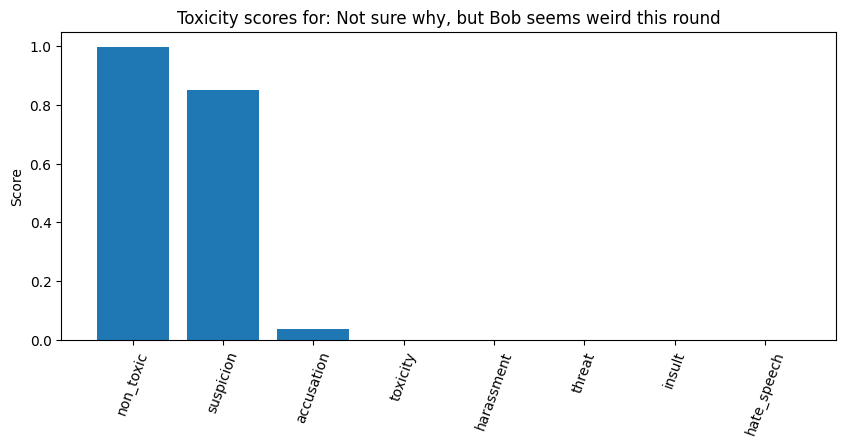

In [14]:
import matplotlib.pyplot as plt

def plot_toxicity(result):
    labels = list(result["toxicity_scores"].keys())
    scores = list(result["toxicity_scores"].values())

    plt.figure(figsize=(10, 4))
    plt.bar(labels, scores)
    plt.xticks(rotation=70)
    plt.ylabel("Score")
    plt.title(f"Toxicity scores for: {result['input']}")
    plt.show()

plot_toxicity(results[7])   # visualisiert ersten Text



In [15]:
# Extension: Add Custom Tokens (Optional)
tokenizer = AutoTokenizer.from_pretrained(sentiment_model)
new_tokens = ["whaleshark", "unicorn"]
tokenizer.add_tokens(new_tokens)

2

In [16]:
# Load Full Model for Manual Forward Pass
model = AutoModelForSequenceClassification.from_pretrained(sentiment_model)
text = "I love this project"
encoded = tokenizer(text, return_tensors="pt")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [17]:
with torch.no_grad():
	output = model(**encoded)

	logits = output.logits[0]
	probs = torch.softmax(logits, dim=0)
	config = model.config

	print("Manual classification:")
	for i, p in enumerate(probs):
		label = config.id2label.get(str(i)) or config.id2label.get(i)
		print(label, float(p))

Manual classification:
negative 0.004692219663411379
neutral 0.014753077179193497
positive 0.9805546998977661
